# Neural Networks in PyTorch

In [1]:
# Import necessary packages

# Importing numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Importing PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Importing torchvision to load datasets
from torchvision import datasets, transforms

%matplotlib inline

In [2]:
from torchvision import transforms, datasets

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)), ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

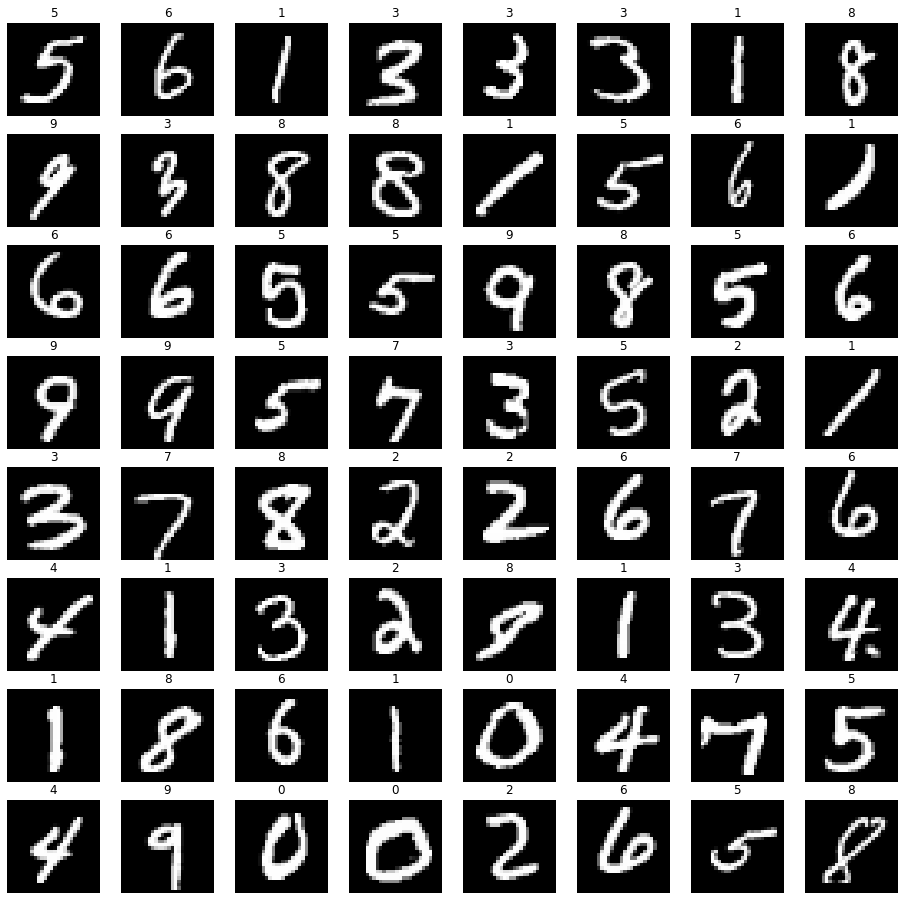

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

fig, ax = plt.subplots(8, 8, figsize=(16, 16))  
for i in range(len(ax)): 
    for j in range(len(ax[i])):
        ax[i,j].imshow(images[i * 8 + j].numpy().squeeze(), cmap='Greys_r')
        ax[i,j].set_title(labels[ i * 8 + j].numpy())
        ax[i,j].axis('off')

In [7]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        
        return output

In [8]:

# Create the network and look at it's text representation
model = Network()
model.cuda()

Network(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [12]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

for e in range(90):
    running_loss = 0
    for images, labels in trainloader:
        # Loading Mnsit to GPU
        images = images.cuda()
        labels = labels.cuda()
        
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
    
    if(e % 10 == 0):
        checkpoint_path = os.path.join("./chekpoints", 'alexnet_states_e{}.pkl'.format(epoch + 1))
        state = {
            'epoch': epoch,
            'total_steps': total_steps,
            'optimizer': optimizer.state_dict(),
            'model': alexnet.state_dict(),
            'seed': seed,
        }
        torch.save(state, checkpoint_path)

Training loss: 0.19693671501299212
Training loss: 0.18955269431286276
Training loss: 0.18158981678630115
Training loss: 0.17363043915408888
Training loss: 0.1671647955613858
Training loss: 0.16161870212951449
Training loss: 0.1565191228705238
Training loss: 0.14983990429831084
Training loss: 0.1468128830170644
Training loss: 0.14310707899330777
Training loss: 0.13803512204303417
Training loss: 0.13611347660390552
Training loss: 0.12805411473774453
Training loss: 0.12405406900925804
Training loss: 0.12198817837975427
Training loss: 0.1187374278672659
Training loss: 0.114892875640663
Training loss: 0.11186137190982223
Training loss: 0.11078393632081399
Training loss: 0.10710136247659797
Training loss: 0.10549413110179179
Training loss: 0.1017948363576013
Training loss: 0.09805234954523634
Training loss: 0.09654070622424708
Training loss: 0.09475377310456624
Training loss: 0.08986971742197522
Training loss: 0.0905432723033657
Training loss: 0.08838571938497425
Training loss: 0.08707588026

KeyboardInterrupt: 